# Word representation

📌 text representation refers to the process of converting `raw text` into a `numerical format` that machine learning models can understand and work with.

📌 Each method offers a different perspective on how to capture the essence of text and pave the way for powerful nlp applications.

### One-Hot Encoding


📌 creates new columns for each category where 1 means the category is present and 0 means it is not.

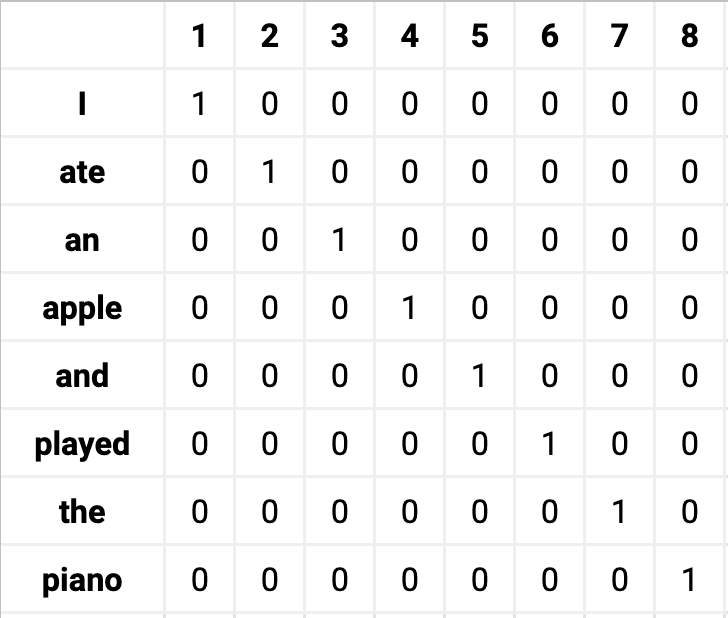

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

Categorical data to be converted to numeric data

In [2]:
colors = (["red", "green", "yellow", "red", "blue"])

integer mapping using LabelEncoder

In [3]:
label_encoder = LabelEncoder()

In [4]:
integer_encoded = label_encoder.fit_transform(colors)
integer_encoded

array([2, 1, 3, 2, 0], dtype=int64)

In [5]:
len(integer_encoded)

5

In [6]:
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1) # We changed the dim of the array from 1-d to 2-d because OneHotEncoder expect a 2-d array from us as and input
integer_encoded

array([[2],
       [1],
       [3],
       [2],
       [0]], dtype=int64)

One hot encoding

In [7]:
onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
onehot_encoded

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

### Bag of Words

📌 A bag of words is a representation of text that describes the occurrence of words within a document

📌 it ignores the order and structure of words in the document

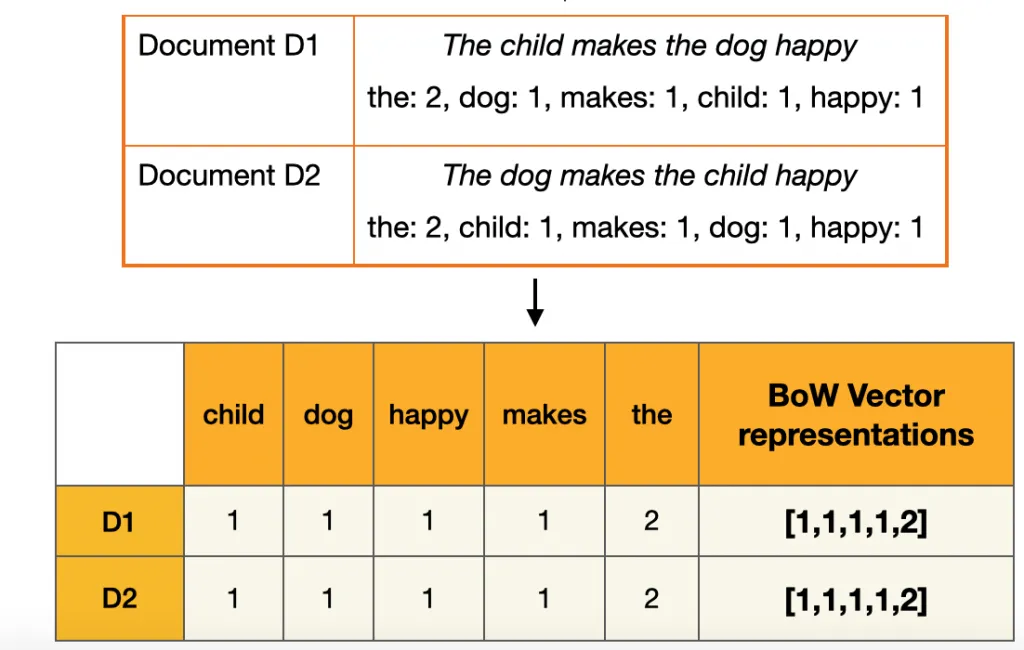

In [8]:
import nltk

In [9]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
input_list = ["Joe waited for the train", "The train was late", "Mary and Samantha took the bus", "I looked for Mary and Samantha at the bus station","Mary and Samantha arrived at the bus station early but waited until noon for the bus"]

In [11]:
from nltk.tokenize import word_tokenize

In [12]:
tokens = []

for i in range(len(input_list)):
    tokens +=(word_tokenize(input_list[i]))
    
tokens

['Joe',
 'waited',
 'for',
 'the',
 'train',
 'The',
 'train',
 'was',
 'late',
 'Mary',
 'and',
 'Samantha',
 'took',
 'the',
 'bus',
 'I',
 'looked',
 'for',
 'Mary',
 'and',
 'Samantha',
 'at',
 'the',
 'bus',
 'station',
 'Mary',
 'and',
 'Samantha',
 'arrived',
 'at',
 'the',
 'bus',
 'station',
 'early',
 'but',
 'waited',
 'until',
 'noon',
 'for',
 'the',
 'bus']

In [13]:
from nltk.corpus import stopwords

In [14]:
stop_words = set(stopwords.words('english'))

In [15]:
clean_tokens = []

for w in tokens:
    if w.lower() not in stop_words:
        clean_tokens.append(w)

clean_tokens

['Joe',
 'waited',
 'train',
 'train',
 'late',
 'Mary',
 'Samantha',
 'took',
 'bus',
 'looked',
 'Mary',
 'Samantha',
 'bus',
 'station',
 'Mary',
 'Samantha',
 'arrived',
 'bus',
 'station',
 'early',
 'waited',
 'noon',
 'bus']

In [16]:
import numpy as np

In [17]:
for sentence in input_list:
    words = word_tokenize(sentence)
    bag_vector = np.zeros(len(clean_tokens))
    
    for w in words:
        for i,word in enumerate(clean_tokens):
            if word == w:
                bag_vector[i] += 1

    print("{0}\n{1}\n".format(sentence,np.array(bag_vector)))

Joe waited for the train
[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

The train was late
[0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Mary and Samantha took the bus
[0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1.]

I looked for Mary and Samantha at the bus station
[0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1.]

Mary and Samantha arrived at the bus station early but waited until noon for the bus
[0. 1. 0. 0. 0. 1. 1. 0. 2. 0. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2.]



### Count Vectorizer

📌 creates a matrix in which `each unique word is represented by a column of the matrix`, and `each text sample from the document is a row in the matrix`. The value of each cell is nothing but the `count of the word` in that particular text sample.

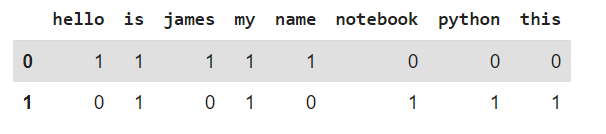


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
vectorizer = CountVectorizer()

In [21]:
# tokenize and build vocab
vectorizer.fit(input_list)
print(vectorizer.vocabulary_)

{'joe': 7, 'waited': 18, 'for': 6, 'the': 14, 'train': 16, 'was': 19, 'late': 8, 'mary': 10, 'and': 0, 'samantha': 12, 'took': 15, 'bus': 3, 'looked': 9, 'at': 2, 'station': 13, 'arrived': 1, 'early': 5, 'but': 4, 'until': 17, 'noon': 11}


In [22]:
# encode document
vector = vectorizer.transform(input_list)

In [23]:
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(5, 20)
[[0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0]
 [1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0]
 [1 1 1 2 1 1 1 0 0 0 1 1 1 1 2 0 0 1 1 0]]


### TF-IDF

📌 is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents (corpus).

📌 Term Frequency (TF): Measures how often a word appears in a document. A higher frequency suggests greater importance. If a term appears frequently in a document, it is likely relevant to the document’s content.

📌 Inverse Document Frequency (IDF): Reduces the weight of common words across multiple documents while increasing the weight of rare words. If a term appears in fewer documents, it is more likely to be meaningful and specific.

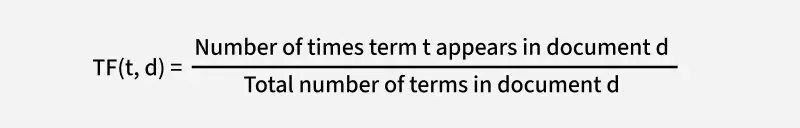

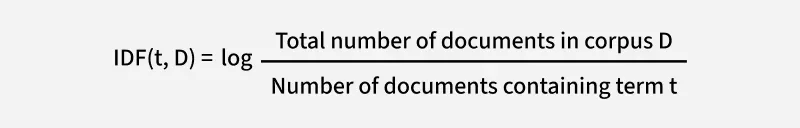

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
vectroizer2 = TfidfVectorizer()

In [27]:
response = vectroizer2.fit_transform(input_list)

In [28]:
response

<5x20 sparse matrix of type '<class 'numpy.float64'>'
	with 38 stored elements in Compressed Sparse Row format>

In [29]:
print(response)

  (0, 7)	0.5795370067919515
  (0, 18)	0.46756680801802136
  (0, 6)	0.3881226876930511
  (0, 14)	0.27615248891912103
  (0, 16)	0.46756680801802136
  (1, 14)	0.2808823162882302
  (1, 16)	0.47557510189256375
  (1, 19)	0.5894630806320427
  (1, 8)	0.5894630806320427
  (2, 14)	0.2741475469087353
  (2, 10)	0.3853048116536737
  (2, 0)	0.3853048116536737
  (2, 12)	0.3853048116536737
  (2, 15)	0.575329410850889
  (2, 3)	0.3853048116536737
  (3, 6)	0.306593048187538
  (3, 14)	0.21814347892295216
  (3, 10)	0.306593048187538
  (3, 0)	0.306593048187538
  (3, 12)	0.306593048187538
  (3, 3)	0.306593048187538
  (3, 9)	0.4577985855605202
  (3, 2)	0.3693490162959343
  (3, 13)	0.3693490162959343
  (4, 18)	0.23843887678921322
  (4, 6)	0.1979258068001585
  (4, 14)	0.28165168335851165
  (4, 10)	0.1979258068001585
  (4, 0)	0.1979258068001585
  (4, 12)	0.1979258068001585
  (4, 3)	0.395851613600317
  (4, 2)	0.23843887678921322
  (4, 13)	0.23843887678921322
  (4, 1)	0.295538841910116
  (4, 5)	0.295538841910116
 

### N-Gram

📌 N-gram can be defined as the contiguous sequence of n items from a given sample of text or speech. The items can be letters, words, or base pairs according to the application. The N-grams typically are collected from a text or speech corpus (A long text dataset).

📌 For instance, N-grams can be unigrams like (“This”, “article”, “is”, “on”, “NLP”) or bigrams (“This article”, “article is”, “is on”, “on NLP”), or trigram and so on

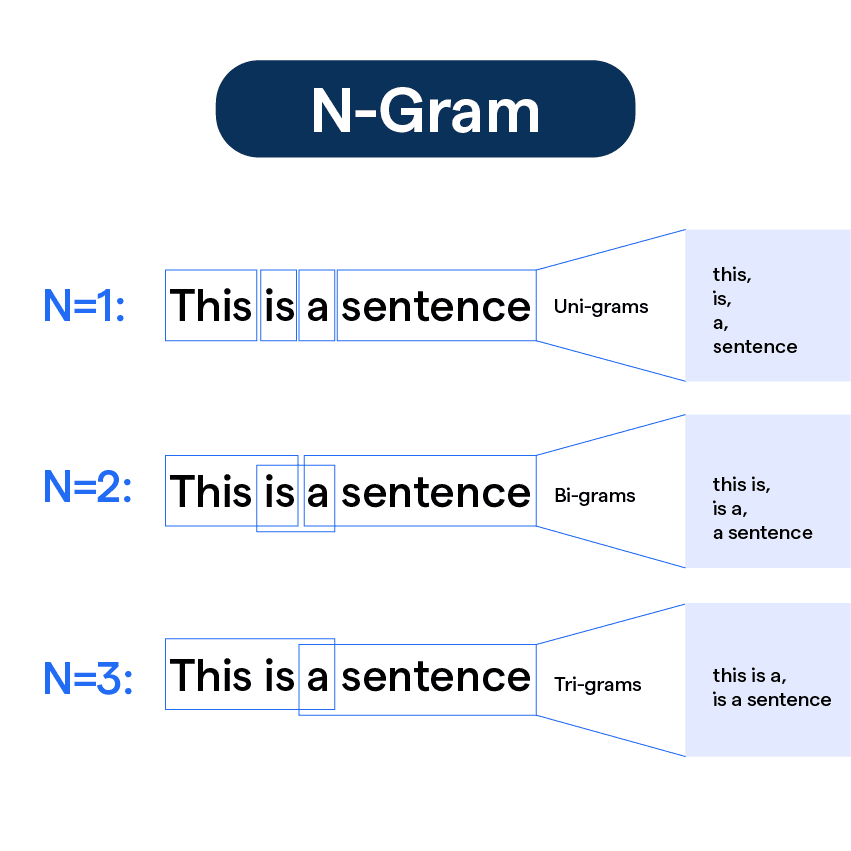

In [30]:
import re
from nltk.util import ngrams

In [31]:
output = list(ngrams(tokens, 5))

In [32]:
output

[('Joe', 'waited', 'for', 'the', 'train'),
 ('waited', 'for', 'the', 'train', 'The'),
 ('for', 'the', 'train', 'The', 'train'),
 ('the', 'train', 'The', 'train', 'was'),
 ('train', 'The', 'train', 'was', 'late'),
 ('The', 'train', 'was', 'late', 'Mary'),
 ('train', 'was', 'late', 'Mary', 'and'),
 ('was', 'late', 'Mary', 'and', 'Samantha'),
 ('late', 'Mary', 'and', 'Samantha', 'took'),
 ('Mary', 'and', 'Samantha', 'took', 'the'),
 ('and', 'Samantha', 'took', 'the', 'bus'),
 ('Samantha', 'took', 'the', 'bus', 'I'),
 ('took', 'the', 'bus', 'I', 'looked'),
 ('the', 'bus', 'I', 'looked', 'for'),
 ('bus', 'I', 'looked', 'for', 'Mary'),
 ('I', 'looked', 'for', 'Mary', 'and'),
 ('looked', 'for', 'Mary', 'and', 'Samantha'),
 ('for', 'Mary', 'and', 'Samantha', 'at'),
 ('Mary', 'and', 'Samantha', 'at', 'the'),
 ('and', 'Samantha', 'at', 'the', 'bus'),
 ('Samantha', 'at', 'the', 'bus', 'station'),
 ('at', 'the', 'bus', 'station', 'Mary'),
 ('the', 'bus', 'station', 'Mary', 'and'),
 ('bus', 'statio

### Occurrence Matrix & Co-occurrence Matrix

📌 Occurrence matrix: A matrix showing `how often each item` (e.g., word or feature) `appears in each document` or context.

📌 Co-occurrence matrix: A matrix showing `how often pairs of items appear together within a defined context` (e.g., window, document).

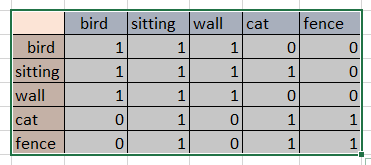

*Image shows an example of co-occurrence matrix*

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
# Define the input text
text = ["this is a sample text to demonstrate occurrence and co-occurrence matrix"]

In [35]:
# Create a CountVectorizer object
vectorizer = CountVectorizer()

In [36]:
# Fit and transform the input text using the CountVectorizer
count_matrix = vectorizer.fit_transform(text)
count_matrix

<1x10 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [37]:
# Print the occurrence matrix
print("Occurrence Matrix:")
print(count_matrix.toarray())

Occurrence Matrix:
[[1 1 1 1 1 2 1 1 1 1]]


In [38]:
# Define the window size for co-occurrence
window_size = 2

In [39]:
# Create a CountVectorizer object for co-occurrence
cooc_vectorizer = CountVectorizer(analyzer='word', ngram_range=(2,2))

In [40]:
# Fit and transform the input text using the co-occurrence CountVectorizer
cooc_matrix = cooc_vectorizer.fit_transform(text)

In [41]:
# Print the co-occurrence matrix
print("Co-occurrence Matrix:")
print(cooc_matrix.toarray())

Co-occurrence Matrix:
[[1 1 1 1 1 1 1 1 1 1]]
